# Pre-processing of the `Facebook` dataset for human annotation


## Installs and imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Load the `Facebook` dataset


Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the CSV

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/CrowdTangle-NLP/FB_dataset.csv')

Check the shape of the pandas dataframe

In [4]:
df.shape

(375922, 3)

Check the column names of the dataframe

In [5]:
df.columns

Index(['message', 'messageSentiment.score', 'messageHate.score'], dtype='object')

Declare labels

In [6]:
labels_ids_hate = {'non-hateful': 0, 'hateful': 1}
n_labels = 2

## Statistics of the results

Overall numbers

In [7]:
print ("Total number of non-hateful content within the dataset", len(df [df['messageHate.score'] == 0]))
print ("Total number of hateful content within the dataset", len(df [df['messageHate.score'] == 1]))

Total number of non-hateful content within the dataset 331892
Total number of hateful content within the dataset 44030


Histograms of the predicted scores

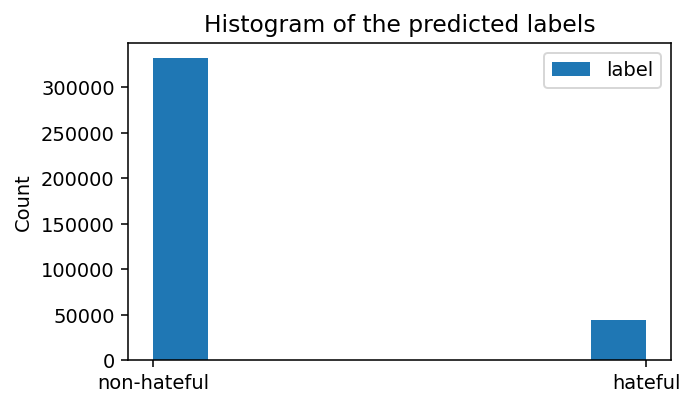

In [8]:
x = np.arange(n_labels)
bins = np.linspace(0, 1, 10)

fig, ax = plt.subplots (figsize=(5, 3), dpi=140)
plt.title ('Histogram of the predicted labels')
plt.hist (df ['messageHate.score'], bins, label=['label'] )
ax.set_ylabel ('Count')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_hate.keys()))
ax.legend (loc='upper right')
plt.show ()

## Prepare the annotation dataset - randomly select the dataset

Randomly select N entries from non-hate category





In [9]:
df_nonhate = df [df['messageHate.score'] == 0]
df_nonhate = df_nonhate.sample(n = 384) # randomly select N entries

Randomly select N entries from hate category

In [10]:
df_hate = df [df['messageHate.score'] == 1]
df_hate = df_hate.sample(n = 381) # randomly select N entries

Append sampled non-hate dataset with samples hate dataset

In [11]:
df_anot = df_hate.append (df_nonhate)

Total size of the dataset

In [12]:
print (len(df_anot))

765


Shuffle the dataframe and reset index

In [13]:
df_anot = df_anot.sample(frac=1).reset_index(drop=True)

Print the first 40 entries

In [14]:
df_anot.head(40)

,message,messageSentiment.score,messageHate.score
0,ये मुगलों का आभार भी जता चुकी है!,2,1
1,सवाल पूछता है ब्रह्मर्षि किस 🕌मस्जिद में हवन 🔥...,1,1
2,कुरान की 26 आयतों को हटाने के लिए वसीम रिज़वी न...,1,0
3,जब तक अदालत दोषी करार ना दे तब तक वाड्रा को अप...,0,1
4,यूपी - 2016 की परेड यूपी - 2022 की परेड,1,0
5,"उल्लू को सूर्य से परेशानी हैं, और उल्लू के पठ्...",2,1
6,एक छोटी सी मुहिम से जुड़ते चले अगली बार पछताना...,1,0
7,"प्रशांत किशोर ने लिख दिया था ऐसा,PM मोदी के ऑफ...",1,0
8,"370 हटने के बाद कश्मीर में अब जो शांति है ,शान...",0,1
9,विक्की-कैटरीना कैफ के Wedding Venue का हुआ खुल...,1,0


Plot histogram of the annotation labels

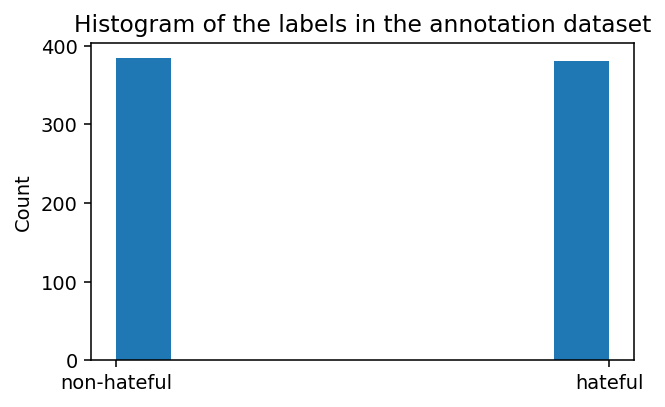

In [15]:
x = np.arange(n_labels)
bins = np.linspace(0, 1, 10)

fig, ax = plt.subplots (figsize=(5, 3), dpi=140)
plt.title ('Histogram of the labels in the annotation dataset')
plt.hist (df_anot ['messageHate.score'], bins )
ax.set_ylabel ('Count')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_hate.keys()))
#ax.legend (loc='upper right')
plt.show ()

Save the annotation dataset as CSV

In [16]:
df_anot.to_csv('/content/drive/MyDrive/CrowdTangle-NLP/FB-annotation-dataset.csv', index=False)